### Linear regression & Logistic regression

some exercises on prediction using sklearn. 

In [11]:
from IPython.display import display, Latex, Markdown
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
import re
from sklearn.model_selection import KFold
#from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler


### Data:
__Data Source__:
Data file is named: __Energy.csv__ 

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


In [12]:
df = pd.read_csv('Energy.csv')
display(df.head())
print(df.isnull().sum())
(df.describe()).loc[["min", 'max', '25%', '50%', '75%']]

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
dtype: int64


,X1,X2,X3,X4,X5,X6,X7,X8,Y1
min,0.6200,514.500,245.0,110.250,3.50,2.00,0.00,0.00,6.0100
max,0.9800,808.500,416.5,220.500,7.00,5.00,0.40,5.00,43.1000
25%,0.6825,606.375,294.0,140.875,3.50,2.75,0.10,1.75,12.9925
50%,0.7500,673.750,318.5,183.750,5.25,3.50,0.25,3.00,18.9500
75%,0.8300,741.125,343.0,220.500,7.00,4.25,0.40,4.00,31.6675


 __REGRESSION__:

Using the data, we want to predict "Heating load". The output variable is continuous. Hence, we need to use a regression algorithm.  


In [13]:
#spt = np.random.rand(len(df)) < 0.8
#train = df[spt]
#test = df[~spt]

X = df[['X1','X2','X3','X4','X5','X6','X7','X8']].values
y = df[['Y1']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print('intercept:', regressor.intercept_) 
print('coefficient values:', regressor.coef_) 

intercept: [84.50671242]
coefficient values: [[-6.42688404e+01 -6.28936957e-02  3.67078157e-02 -4.98007557e-02
   4.11430910e+00 -1.25900388e-01  1.95157505e+01  1.97512265e-01]]


In [14]:
#np.sqrt(metrics.mean_squared_error
def RMSE(pred, tar): 
    return np.sqrt(((pred - tar) ** 2).mean())

q1_3_a = RMSE(regressor.predict(X_train), y_train)
print(' training RMSE:', q1_3_a)

q1_3_b = RMSE(regressor.predict(X_test), y_test)
print(' test RMSE:', q1_3_b) 

 training RMSE: 2.879398584299829
 test RMSE: 3.0865243377757547


Let's see the effect of amount of data on the performance of prediction model. Use varying amounts of data (100,200,300,400,500,all) from the training data used previously to train different regression models.

for 100 data points: (Training)  2.4732686300003306
for 100 data points: (Test) 3.232989333096236
for 200 data points: (Training)  2.6096844539978488
for 200 data points: (Test) 3.1154552276926193
for 300 data points: (Training)  2.742879899878274
for 300 data points: (Test) 3.09854855135922
for 400 data points: (Training)  2.7208194053761376
for 400 data points: (Test) 3.1118050044162557
for 500 data points: (Training)  2.77902926307626
for 500 data points: (Test) 3.10044099031993
for all data points: (Training)  2.879398584299829
for all data points: (Test) 3.0865243377757547

the more data I have, my error increases


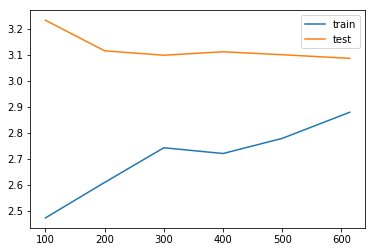

In [15]:
regressor.fit(X_train[:100], y_train[:100]) 
xtr1 = RMSE(regressor.predict(X_test), y_test)
x1 = RMSE(regressor.predict(X_train[:100]), y_train[:100])
print("for 100 data points: (Training) ", x1)
print('for 100 data points: (Test)', xtr1) 
regressor.fit(X_train[:200], y_train[:200]) 
x2 = RMSE(regressor.predict(X_train[:200]), y_train[:200])
xtr2 = RMSE(regressor.predict(X_test), y_test)
print("for 200 data points: (Training) ", x2)
print('for 200 data points: (Test)', RMSE(regressor.predict(X_test), y_test)) 
regressor.fit(X_train[:300], y_train[:300]) 
x3 = RMSE(regressor.predict(X_train[:300]), y_train[:300])
xtr3 = RMSE(regressor.predict(X_test), y_test)
print("for 300 data points: (Training) ", x3)
print('for 300 data points: (Test)', RMSE(regressor.predict(X_test), y_test))
regressor.fit(X_train[:400], y_train[:400]) 
x4 = RMSE(regressor.predict(X_train[:400]), y_train[:400])
xtr4 = RMSE(regressor.predict(X_test), y_test)
print("for 400 data points: (Training) ", x4)
print('for 400 data points: (Test)', RMSE(regressor.predict(X_test), y_test)) 
regressor.fit(X_train[:500], y_train[:500]) 
x5 = RMSE(regressor.predict(X_train[:500]), y_train[:500])
xtr5 = RMSE(regressor.predict(X_test), y_test)
print("for 500 data points: (Training) ", x5)
print('for 500 data points: (Test)', RMSE(regressor.predict(X_test), y_test)) 
regressor.fit(X_train, y_train) 
xall = RMSE(regressor.predict(X_train), y_train)
xtrall = RMSE(regressor.predict(X_test), y_test)
print("for all data points: (Training) ", xall)
print('for all data points: (Test)', RMSE(regressor.predict(X_test), y_test)) 
print()
print("the more data I have, my error increases")

value = [x1, x2, x3, x4, x5, xall]
value2 = [xtr1, xtr2, xtr3, xtr4, xtr5, xtrall,]
nums = [100, 200, 300, 400, 500, len(X_train)]


plt.plot(nums, value, label = 'train')
plt.plot(nums, value2, label = 'test')
plt.legend()
plt.show()


__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.

Here the model is trained to classify each instance into a set of predefined discrete classes. On inputting a feature vector into the model, the trained model is able to predict a class of that instance.

Bucket the values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:

0: 'Low' ( < 14),   
1: 'Medium'  (14-28),   
2: 'High'  (>28)


In [16]:
df['class'] = pd.cut(df["Y1"], [0,14,28, np.inf], include_lowest = True, labels = ["Low", 'Medium', 'High'])
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,class
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,Medium
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,Medium
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,Medium
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,Medium
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,Medium


In [17]:
X = df[['X1','X2','X3','X4','X5','X6','X7','X8']]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)
LogisticRegressionModel = linear_model.LogisticRegression()
LogisticRegressionModel.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

- Print the training and test accuracies
- Print the confusion matrix
- Print the precision and recall numbers for all the classes


In [18]:
training_accuracy=LogisticRegressionModel.score(X_train,y_train)
print ('Training Accuracy:',training_accuracy)
test_accuracy=LogisticRegressionModel.score(X_test,y_test)
print ('Test Accuracy:',test_accuracy) 
print()
y_true = y_test
y_pred = LogisticRegressionModel.predict(X_test)
ConfusionMatrix=pd.DataFrame(confusion_matrix(y_true, y_pred),columns=['Predicted Low','Predicted Medium','Predicted High'],index=['Actual Low','Actual Medium','Actual High'])
print ('Confusion matrix of test data is: \n',ConfusionMatrix)
print()
print("Average precision for the 3 classes is - ", precision_score(y_true, y_pred, average = None))
print()
from sklearn.metrics import recall_score
print("Average recall for the 3 classes is - ", recall_score(y_true, y_pred, average = None))

Training Accuracy: 0.8078175895765473
Test Accuracy: 0.7857142857142857

Confusion matrix of test data is: 
                Predicted Low  Predicted Medium  Predicted High
Actual Low                56                 0               0
Actual Medium              0                40               1
Actual High               21                11              25

Average precision for the 3 classes is -  [0.72727273 0.78431373 0.96153846]

Average recall for the 3 classes is -  [1.         0.97560976 0.43859649]


##### K Fold Cross Validation

 In k-fold cross-validation, the shuffled training data is partitioned into k disjoint sets and the model is trained on k −1 sets and validated on the kth set. This process is repeated k times with each set chosen as the validation set once. The cross-validation accuracy is reported as the average accuracy of the k iterations


In [19]:
X = df[['X1','X2','X3','X4','X5','X6','X7','X8']]
y = df['class']
F = KFold(n_splits=7, random_state=5, shuffle = True) 
LM = linear_model.LogisticRegression()
scores = cross_val_score(LM, X, y, cv = F)
print('Cross-validated scores:', scores)  
np.mean(scores)

Cross-validated scores: [0.80909091 0.77272727 0.7        0.84545455 0.80909091 0.81651376
 0.80733945]


0.7943166924818301

One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. 
This makes training less sensitive to the scale of features . 
Scaling is important in algorithms that use distance functions as a part of classification. If we Scale features in the range [0,1] it is called unity based normalization.

__Performing unity based normalization on the above dataset and train the model 

In [20]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [21]:
y = df['class']
X = df[['X1','X2','X3','X4','X5','X6','X7','X8']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)
LogisticRegressionModel = linear_model.LogisticRegression()
LogisticRegressionModel.fit(X_train_minmax, y_train) 
training_accuracy=LogisticRegressionModel.score(X_train_minmax,y_train)
print ('Training Accuracy:',training_accuracy) 
test_accuracy=LogisticRegressionModel.score(X_test_minmax,y_test)
print ('Test Accuracy:',test_accuracy) 
print()
y_true = y_test
y_pred = LogisticRegressionModel.predict(X_test_minmax)
ConfusionMatrix=pd.DataFrame(confusion_matrix(y_true, y_pred),columns=['Predicted Low','Predicted Medium','Predicted High'],index=['Actual Low','Actual Medium','Actual High'])
print ('Confusion matrix of test data is: \n',ConfusionMatrix)
print()
print("Average precision for the 3 classes is - ", precision_score(y_true, y_pred, average = None))
print()
from sklearn.metrics import recall_score
print("Average recall for the 3 classes is - ", recall_score(y_true, y_pred, average = None))

Training Accuracy: 0.8061889250814332
Test Accuracy: 0.8311688311688312

Confusion matrix of test data is: 
                Predicted Low  Predicted Medium  Predicted High
Actual Low                56                 0               0
Actual Medium              0                39               2
Actual High               20                 4              33

Average precision for the 3 classes is -  [0.73684211 0.90697674 0.94285714]

Average recall for the 3 classes is -  [1.         0.95121951 0.57894737]


In [26]:
print("It works significantly better as compared to q2.2 for the test accuracy but the training accuracy is very slightly worse. It was 0.8078175895765473 for Training Accuracy before and 0.7857142857142857 Test Accuracy before." )
"But if I change my random state to say a 100 I cansee my accuracies improve a lot. "

It works significantly better as compared to q2.2 for the test accuracy but the training accuracy is very slightly worse. It was 0.8078175895765473 for Training Accuracy before and 0.7857142857142857 Test Accuracy before.


'But if I change my random state to say a 100 I cansee my accuracies improve a lot. '